In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import seaborn as sns
from matplotlib.cm import ScalarMappable
from matplotlib.colors import to_rgba
import matplotlib.cm as cm
from matplotlib import cm
from matplotlib.patches import Patch
import datetime
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

In [2]:
data = pd.read_excel('BEKAERT_PH1.xlsx', sheet_name='Aug-23')

In [3]:
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
data = data.dropna(subset=['Date'])
data['Date'] = data['Date'].dt.strftime('%d')

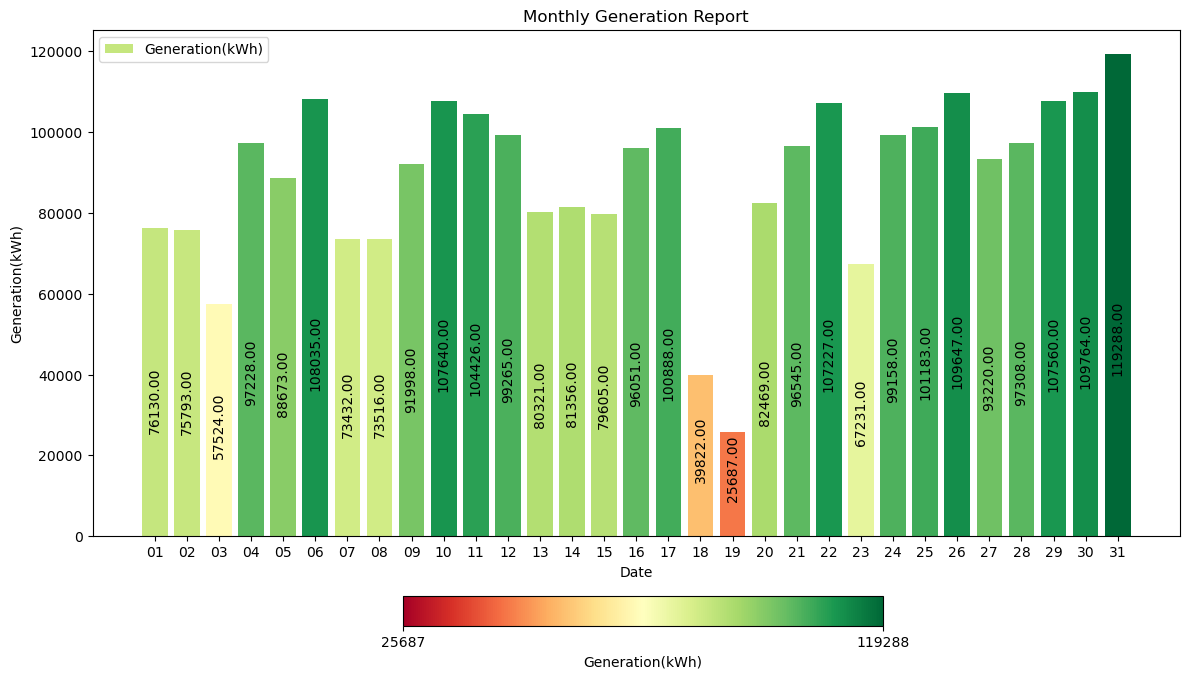

In [4]:
plt.figure(figsize=(12, 6))
bars = plt.bar(data['Date'].astype(str), data['Generation(kWh)'], color=cm.RdYlGn(data['Generation(kWh)'] / data['Generation(kWh)'].max()), label='Generation(kWh)')
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}',
                 xy=(bar.get_x() + bar.get_width()/2, height/3),
                 xytext=(0, 0),
                 textcoords="offset points",
                 ha='center',
                 va='bottom',  
                 rotation=90)
plt.xlabel('Date')
plt.ylabel('Generation(kWh)')
plt.title('Monthly Generation Report')
plt.legend()
plt.tight_layout()
plt.grid(False)
sm = plt.cm.ScalarMappable(cmap=cm.RdYlGn, norm=plt.Normalize(vmin=data['Generation(kWh)'].min(), vmax=data['Generation(kWh)'].max()))
sm.set_array([])
cax = plt.axes([0.34, -0.052, 0.4, 0.05])
cbar = plt.colorbar(sm, cax=cax, orientation='horizontal')
cbar.set_label('Generation(kWh)')
cbar.set_ticks([data['Generation(kWh)'].min(), data['Generation(kWh)'].max()])
#plt.savefig('monthly_generation.jpg', dpi=300, bbox_inches='tight',orientation ='landscape')
plt.show()

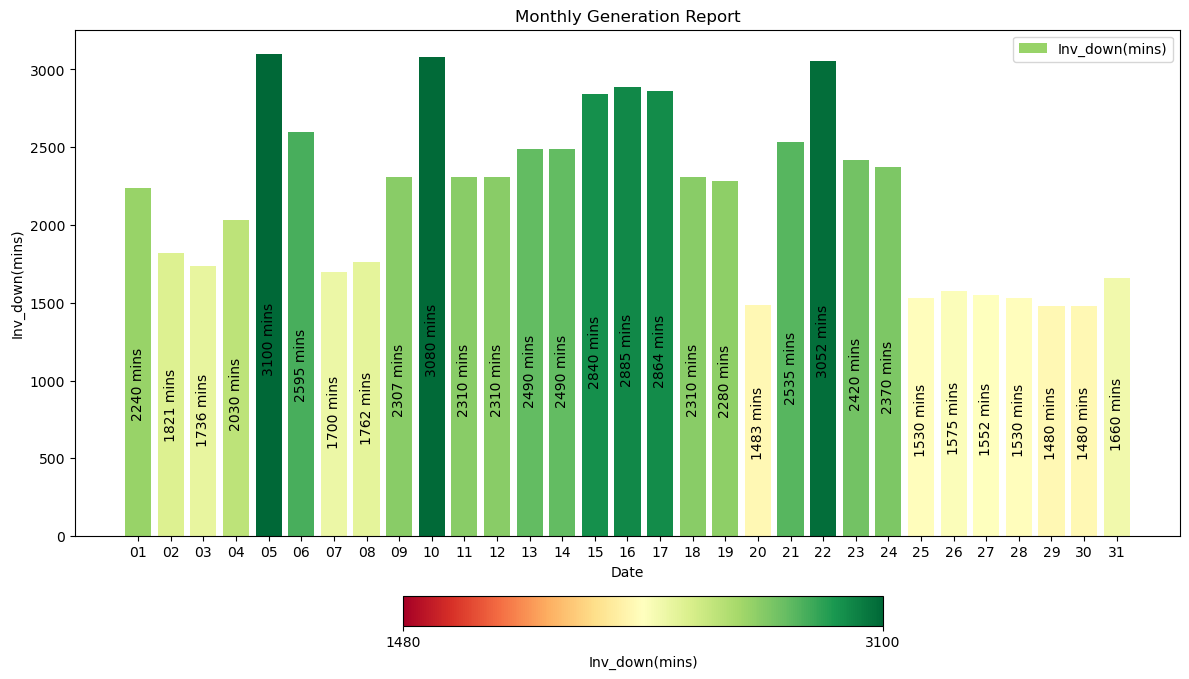

In [5]:
plt.figure(figsize=(12, 6))
bars = plt.bar(data['Date'].astype(str), data['Inv_down(mins)'], color=cm.RdYlGn(data['Inv_down(mins)'] / data['Inv_down(mins)'].max()), label='Inv_down(mins)')
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.0f} mins',
                 xy=(bar.get_x() + bar.get_width()/2, height/3),
                 xytext=(0, 0),
                 textcoords="offset points",
                 ha='center',
                 va='bottom',  
                 rotation=90)
plt.xlabel('Date')
plt.ylabel('Inv_down(mins)')
plt.title('Monthly Generation Report')
plt.legend()
plt.tight_layout()
plt.grid(False)
sm = plt.cm.ScalarMappable(cmap=cm.RdYlGn, norm=plt.Normalize(vmin=data['Inv_down(mins)'].min(), vmax=data['Inv_down(mins)'].max()))
sm.set_array([])
cax = plt.axes([0.34, -0.052, 0.4, 0.05])
cbar = plt.colorbar(sm, cax=cax, orientation='horizontal')
cbar.set_label('Inv_down(mins)')
cbar.set_ticks([data['Inv_down(mins)'].min(), data['Inv_down(mins)'].max()])
#plt.savefig('inverter_down_time.jpg', dpi=300, bbox_inches='tight',orientation ='landscape')
plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

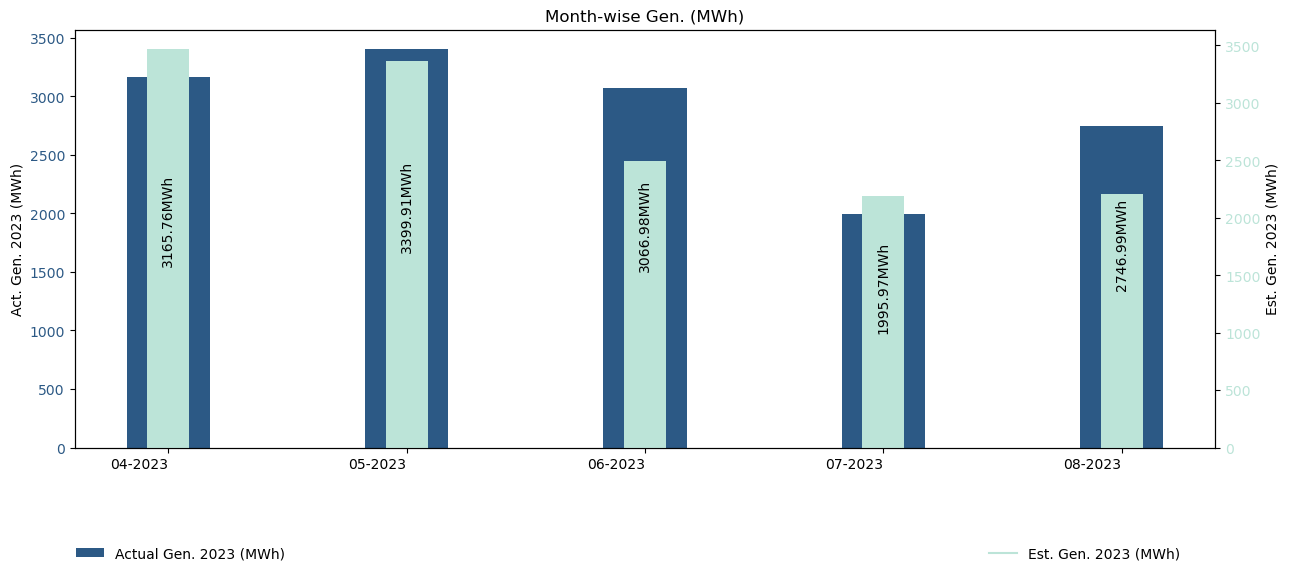

In [12]:
Year = pd.to_datetime(data['Year_2023'], format='%d-%m-%Y')
years = Year.dt.strftime("%m-%Y")

column_act_gen = data['Act_Gen_in_2023_(MWh)']
col_act_gen = [round(value, 2) for value in column_act_gen]

est_gen = data['Est_Gen_in_2023_(MWh)']

fig, ax1 = plt.subplots(figsize=(13, 6))
x_positions = range(len(years))
ax1.bar(x=x_positions, height=col_act_gen, width=0.35, align='center', color='#2c5985', label='Actual Gen. 2023 (MWh)')
ax1.set_xticks(x_positions) 
ax1.set_xticklabels(years, rotation=0, ha='right') 
ax1.set_ylabel('Act. Gen. 2023 (MWh)', color='black')
ax1.tick_params(axis='y', labelcolor='#2c5985')

ax2 = ax1.twinx()

for i, est in enumerate(est_gen):
    ax2.bar(x=x_positions[i], height=est, width=0.35 / 2, align='center', color='#bce4d8')
    ax2.text(x_positions[i], col_act_gen[i] // 2, str(col_act_gen[i])+"MWh", va='bottom', ha='center', rotation=90, color='black', fontsize=10)

legend_elements = [plt.Line2D([0], [0], color='#bce4d8', label='Est. Gen. 2023 (MWh)')]
ax2.legend(handles=legend_elements, bbox_to_anchor=(0.98, -0.3), loc='lower right', frameon=False)

ax2.set_ylabel('Est. Gen. 2023 (MWh)', color='black')
ax2.tick_params(axis='y', labelcolor='#bce4d8')

ax1.legend(bbox_to_anchor=(-0.01, -0.3), loc='lower left', frameon=False)

plt.title('Month-wise Gen. (MWh)')
plt.tight_layout()
plt.savefig('Monthly_Act_Gen.jpg', dpi=300, bbox_inches='tight', orientation='landscape')
plt.show()

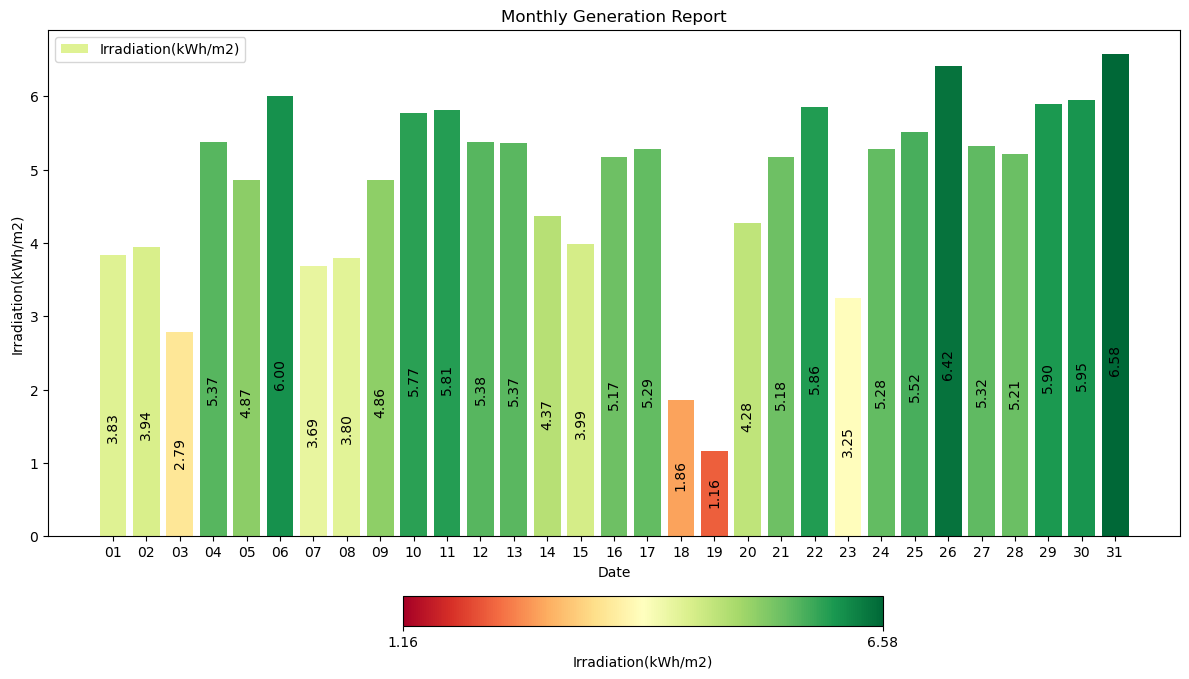

In [7]:
plt.figure(figsize=(12, 6))
bars = plt.bar(data['Date'].astype(str), data['Irradiation(kWh/m2)'], color=cm.RdYlGn(data['Irradiation(kWh/m2)'] / data['Irradiation(kWh/m2)'].max()), label='Irradiation(kWh/m2)')
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}',
                 xy=(bar.get_x() + bar.get_width()/2, height/3),
                 xytext=(0, 0),
                 textcoords="offset points",
                 ha='center',
                 va='bottom',  
                 rotation=90)
plt.xlabel('Date')
plt.ylabel('Irradiation(kWh/m2)')
plt.title('Monthly Generation Report')
plt.legend()
plt.tight_layout()
plt.grid(False)
sm = plt.cm.ScalarMappable(cmap=cm.RdYlGn, norm=plt.Normalize(vmin=data['Irradiation(kWh/m2)'].min(), vmax=data['Irradiation(kWh/m2)'].max()))
sm.set_array([])
cax = plt.axes([0.34, -0.052, 0.4, 0.05])
cbar = plt.colorbar(sm, cax=cax, orientation='horizontal')
cbar.set_label('Irradiation(kWh/m2)')
cbar.set_ticks([data['Irradiation(kWh/m2)'].min(), data['Irradiation(kWh/m2)'].max()])
#plt.savefig('Specific_yield.jpg', dpi=300, bbox_inches='tight',orientation ='landscape')
plt.show()

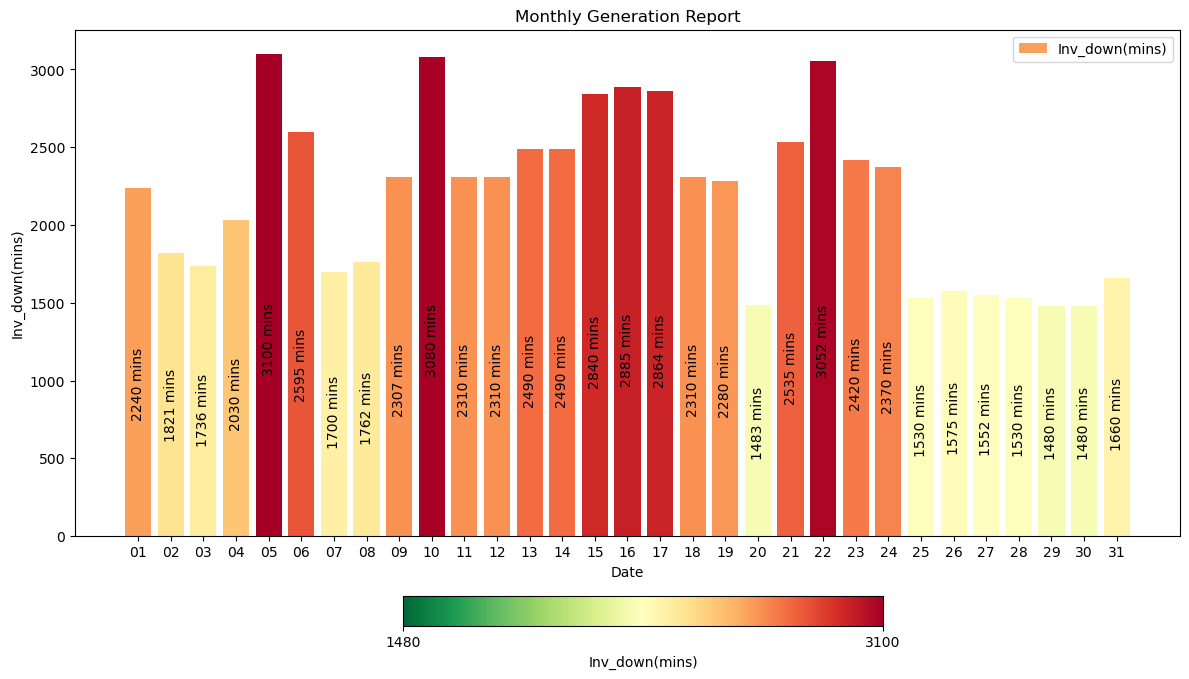

In [8]:
plt.figure(figsize=(12, 6))
bars = plt.bar(data['Date'].astype(str), data['Inv_down(mins)'], color=plt.colormaps['RdYlGn_r'](data['Inv_down(mins)'] / data['Inv_down(mins)'].max()), label='Inv_down(mins)')
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.0f} mins',
                 xy=(bar.get_x() + bar.get_width()/2, height/3),
                 xytext=(0, 0),
                 textcoords="offset points",
                 ha='center',
                 va='bottom',  
                 rotation=90)
plt.xlabel('Date')
plt.ylabel('Inv_down(mins)')
plt.title('Monthly Generation Report')
plt.legend()
plt.tight_layout()
plt.grid(False)
sm = plt.cm.ScalarMappable(cmap=plt.colormaps['RdYlGn_r'], norm=plt.Normalize(vmin=data['Inv_down(mins)'].min(), vmax=data['Inv_down(mins)'].max()))
sm.set_array([])
cax = plt.axes([0.34, -0.052, 0.4, 0.05])
cbar = plt.colorbar(sm, cax=cax, orientation='horizontal')
cbar.set_label('Inv_down(mins)')
cbar.set_ticks([data['Inv_down(mins)'].min(), data['Inv_down(mins)'].max()])
#plt.savefig('inverter_down_time.jpg', dpi=300, bbox_inches='tight', orientation='landscape')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_15008\608723983.py:12: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, orientation='horizontal')


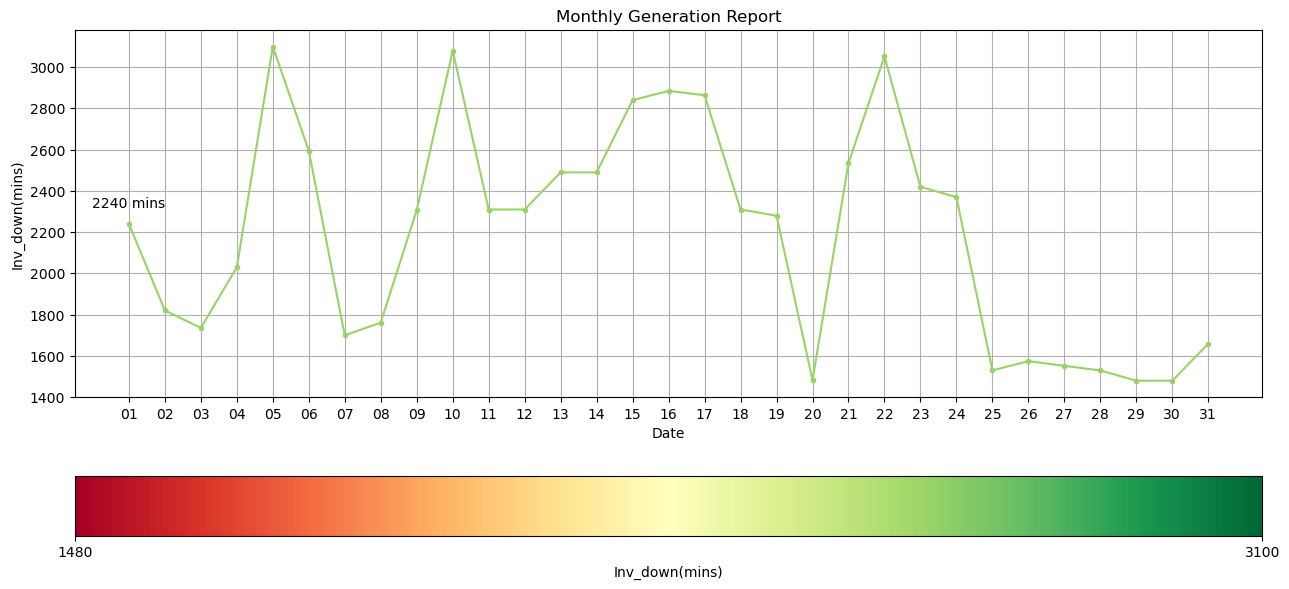

In [9]:
plt.figure(figsize=(13, 6))
colors = plt.colormaps['RdYlGn'](data['Inv_down(mins)'] / data['Inv_down(mins)'].max())
lines = plt.plot(data['Date'].astype(str), data['Inv_down(mins)'], label='Inv_down(mins)', marker='.')

for line, color in zip(lines, colors):
    line.set_color(color)

norm = plt.Normalize(vmin=data['Inv_down(mins)'].min(), vmax=data['Inv_down(mins)'].max())
sm = plt.cm.ScalarMappable(cmap=plt.colormaps['RdYlGn'], norm=norm)
sm.set_array([])

cbar = plt.colorbar(sm, orientation='horizontal')
cbar.set_label('Inv_down(mins)')
cbar.set_ticks([data['Inv_down(mins)'].min(), data['Inv_down(mins)'].max()])

plt.xlabel('Date')
plt.ylabel('Inv_down(mins)')
plt.title('Monthly Generation Report')

for i, line in enumerate(lines):
    height = line.get_ydata()
    date = line.get_xdata()
    plt.annotate(f'{height[0]:.0f} mins',
                 xy=(date[0], height[0]),
                 xytext=(0, 10),
                 textcoords="offset points",
                 ha='center',
                 va='bottom')

plt.tight_layout()
plt.grid(True)
#plt.savefig('inverter_down_time_line.jpg', dpi=300, bbox_inches='tight', orientation='landscape')
plt.show()

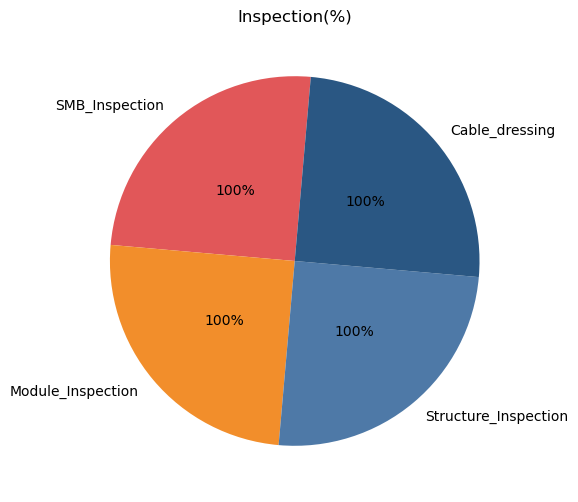

In [10]:
labels = ['SMB_Inspection', 'Module_Inspection','Structure_Inspection', 'Cable_dressing']
sizes = [100, 100, 100, 100]
colors = ['#e15759', '#f28e2b', '#4e79a7', '#2a5783']
fig, ax = plt.subplots(figsize=(6, 6))

def autopct_format(pct):
    total = sum(sizes)
    val = int(round(pct * total / 100.0))
    return f'{val}'+'%'

ax.pie(sizes, labels=labels, colors=colors, startangle=85, autopct=autopct_format, pctdistance=0.50)
plt.title('Inspection(%)')
#plt.savefig('pie2.jpg', dpi=300, bbox_inches='tight', orientation='landscape')
plt.show()